## Import Libraries

In [265]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Image pre-processing (Image Augmentation)

#### Training Set

In [266]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
training_set = train_datagen.flow_from_directory(
    directory = r"Path/to/training_set",
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1098 images belonging to 10 classes.


#### Test set

In [267]:
test_datagen = ImageDataGenerator(
    rescale = 1.0/255,
)
test_set = test_datagen.flow_from_directory(
    directory = r"Path/to/test_set",
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 272 images belonging to 10 classes.


## Build CNN Model

In [268]:
cnn = tf.keras.Sequential()

### First convolutional layer

In [269]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1),
                               padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))

### Max Pooling

In [270]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2, 2), padding = 'valid'))

### Second Convolutional Layer

In [271]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1, 1), activation = 'relu', padding = 'same'))

### Max Pooling

In [272]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))

### Third Convolutional Layer

In [273]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'))

### Max Pooling

In [274]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

### Flattening

In [275]:
cnn.add(tf.keras.layers.Flatten())

### First Dense Layer

In [276]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

### Second Dense Layer

In [277]:
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))

### Third Dense Layer

In [278]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

### Output Layer

In [279]:
cnn.add(tf.keras.layers.Dense(units = len(training_set.class_indices), activation = 'softmax'))

## Compile the CNN Model

In [280]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Train the Model

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

## Prediction

#### Download image from web

In [304]:
from urllib import request
request.urlretrieve("https://www.beardsleyzoo.org/uploads/1/2/4/2/124214186/274_orig.jpg", "monkey.jpg")

('monkey.jpg', <http.client.HTTPMessage at 0x1a9e2e052d0>)

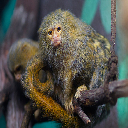

In [305]:
from tensorflow.keras.preprocessing import image
monkey = image.load_img(path = 'monkey.jpg', target_size = (128, 128, 3))
monkey

In [306]:
image_array = tf.keras.utils.img_to_array(monkey)
image_array = image_array / 255.

In [307]:
image_array = image_array.reshape(1, 128, 128, 3)

In [308]:
classes = training_set.class_indices
classes

{'bald_uakari': 0,
 'black_headed_night_monkey': 1,
 'common_squirrel_monkey': 2,
 'japanese_macaque': 3,
 'mantled_howler': 4,
 'nilgiri_langur': 5,
 'patas_monkey': 6,
 'pygmy_marmoset': 7,
 'silvery_marmoset': 8,
 'white_headed_capuchin': 9}

In [309]:
probas_list = cnn.predict(image_array).reshape(-1,)

1/1 [==============================] - 0s 18ms/step


In [310]:
probas_list

array([4.2007866e-07, 8.4621729e-03, 7.9397364e-03, 7.8753260e-07,
       1.6505109e-07, 3.6891589e-07, 1.9407957e-05, 9.8357046e-01,
       5.5113314e-06, 9.8094267e-07], dtype=float32)

#### Getting the index where the max probability list

In [312]:
_max1 = float('-inf')
_max2 = float('-inf')

for probas in enumerate(probas_list):
    if(probas[1] > _max1):
        max2_index = max1_index
        max1_index = probas[0]
        _max2 = _max1
        _max1 = probas[1]
    elif probas[1] > _max2:
        _max2 = probas[1]
        max2_index = probas[0]


#### Fetching the corresponding keys (class labels)

In [313]:
pred_monkeys = [None, None]
for items in classes.items():
    if items[1] == max1_index:
        pred_monkeys[0] = items[0]
    elif items[1] == max2_index:
        pred_monkeys[1] = items[0]
    if pred_monkeys[0] and pred_monkeys[1]:
        break

In [314]:
pred_monkeys = [pred_monkey.replace("_"," ").title() for pred_monkey in pred_monkeys]

# `Final Prediction`

In [315]:
print(f"The given image is predicted as : \"{pred_monkeys[0]}\" with probability {_max1 : .3f}")
print(f"It can also be : \"{pred_monkeys[1]}\" with probability {_max2 : .3f}")

The given image is predicted as : "Pygmy Marmoset" with probability  0.984
It can also be : "Black Headed Night Monkey" with probability  0.008
